In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/home/otavio/ml/datasets/Brasil/homicide.csv')

In [3]:
data

,Estado,Gasto 2017,Homicídios,Poulação,Homicídios per capta,Gasto por habitante,UF
0,Acre,5.120908e+08,530.0,881935.0,60.10,580.64,AC
1,Alagoas,1.121306e+09,1921.0,3337357.0,57.56,335.99,AL
2,Amapá,4.507020e+08,445.0,845731.0,52.62,532.91,AP
3,Amazonas,1.422632e+09,1271.0,4144597.0,30.67,343.25,AM
4,Bahia,4.116715e+09,6915.0,14873064.0,46.49,276.79,BA
5,Ceará,2.162600e+09,5332.0,9132078.0,58.39,236.81,CE
6,Distrito Federal,8.197177e+08,554.0,3015268.0,18.37,271.86,DF
7,Espírito Santo,1.365584e+09,1501.0,4018650.0,37.35,339.81,ES
8,Goiás,2.779339e+09,2665.0,7018354.0,37.97,396.01,GO
9,Maranhão,1.590065e+09,2055.0,7075181.0,43.98,224.74,MA


In [4]:
data['Homicídios per capta'] = data['Homicídios per capta'].apply(lambda x: float(x))

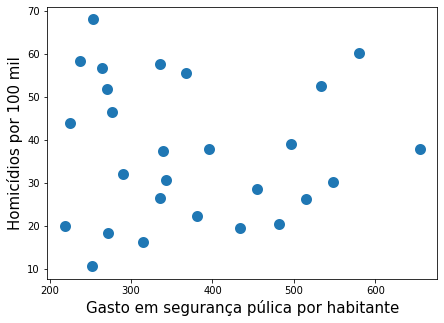

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.scatter(data['Gasto por habitante'], data['Homicídios per capta'], marker='o', linewidths=5)
plt.ylabel('Homicídios por 100 mil', size=15)
plt.xlabel('Gasto em segurança púlica por habitante', size=15)
plt.savefig('out.png')

In [6]:
ideb = pd.read_csv('/home/otavio/ml/datasets/Brasil/ideb.csv')
ideb

,UF,Ideb
0,AC,"4,6"
1,AL,"3,9"
2,AP,"3,5"
3,AM,"4,4"
4,BA,"3,4"
5,CE,"4,9"
6,DF,"4,3"
7,ES,"4,4"
8,GO,"5,1"
9,MA,"3,7"


In [7]:
data = data.merge(ideb, how='left', on='UF')

In [8]:
data['Ideb'] = data['Ideb'].apply(lambda x: float(x.replace(',', '.')))

In [9]:
data.sort_values('Ideb', inplace=True)
data

,Estado,Gasto 2017,Homicídios,Poulação,Homicídios per capta,Gasto por habitante,UF,Ideb
4,Bahia,4.116715e+09,6915.0,14873064.0,46.49,276.79,BA,3.4
19,Rio Grande do Norte,8.859642e+08,2386.0,3506853.0,68.04,252.64,RN,3.4
25,Sergipe,8.455845e+08,1275.0,2298696.0,55.47,367.85,SE,3.4
2,Amapá,4.507020e+08,445.0,845731.0,52.62,532.91,AP,3.5
13,Pará,2.324492e+09,4465.0,8602865.0,51.90,270.20,PA,3.6
14,Paraíba,1.166975e+09,1286.0,4018127.0,32.00,290.43,PB,3.6
9,Maranhão,1.590065e+09,2055.0,7075181.0,43.98,224.74,MA,3.7
1,Alagoas,1.121306e+09,1921.0,3337357.0,57.56,335.99,AL,3.9
22,Roraima,3.965495e+08,230.0,605761.0,37.97,654.63,RR,4.0
16,Pernambuco,2.529880e+09,5426.0,9557071.0,56.77,264.71,PE,4.1


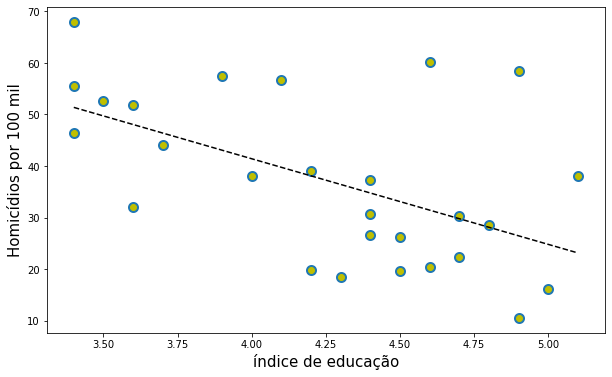

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(data['Ideb'], data['Homicídios per capta'], marker='o', linewidths=5)
plt.ylabel('Homicídios por 100 mil', size=15)
plt.xlabel('índice de educação', size=15)
coef = np.polyfit(data['Ideb'],data['Homicídios per capta'],1)
poly1d_fn = np.poly1d(coef)
plt.plot(data['Ideb'],data['Homicídios per capta'], 'yo', data['Ideb'], poly1d_fn(data['Ideb']), '--k')
plt.savefig('out2.png')

In [11]:
data = data.sort_values('Homicídios per capta', ascending=False).reset_index()
data.index = np.arange(1, len(data)+1)

In [12]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size=10)

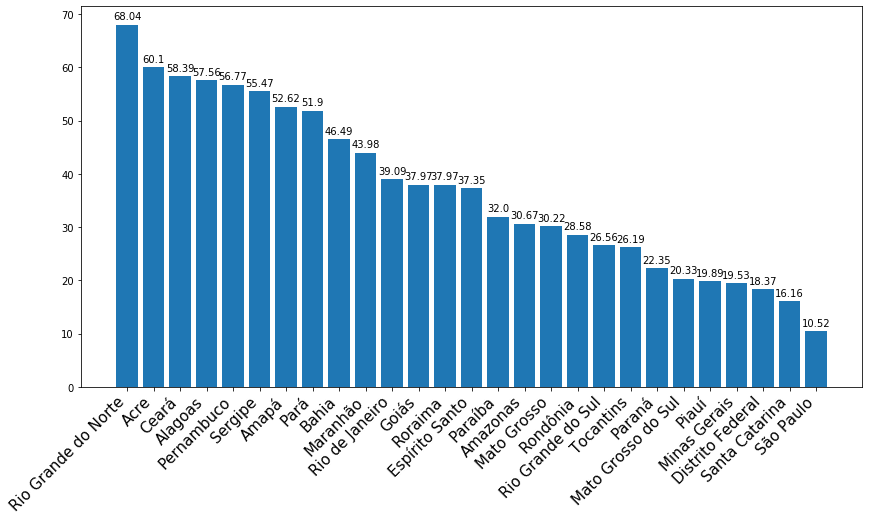

In [13]:
fig, ax = plt.subplots(figsize=(14, 7))
a = plt.bar(data['Estado'], data['Homicídios per capta'])
plt.xticks(rotation=45, size=15, horizontalalignment='right')
autolabel(a)

In [14]:
data.rename(columns={'Homicídios per capta': 'Taxa', 'Gasto por habitante':'Gasto'}, inplace='True')

In [15]:
data = data.sort_values('Gasto', ascending=True).reset_index()
data.index = np.arange(1, len(data)+1)

In [16]:
data[['Estado', 'Gasto']].head(10)

,Estado,Gasto
1,Piauí,218.28
2,Maranhão,224.74
3,Ceará,236.81
4,São Paulo,251.82
5,Rio Grande do Norte,252.64
6,Pernambuco,264.71
7,Pará,270.20
8,Distrito Federal,271.86
9,Bahia,276.79
10,Paraíba,290.43
